In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/2023/splashlog

/content/drive/MyDrive/2023/splashlog


In [8]:
!ls

0927_make_yolo_annotations_main.ipynb  main_icons
230204_main_weapons		       scene_images


In [1]:
import glob
import re
import os
from PIL import Image,ImageOps,ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import unicodedata

# -*- coding: utf-8 -*-

yolo_size = 416

resize_size = (200, 200)


In [2]:
import gdown

url = "https://drive.google.com/file/d/13F6jmhNBTdv1FO20olbku0VPdwZb4dl_/view?usp=share_link"
output = "scene_images.zip"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=13F6jmhNBTdv1FO20olbku0VPdwZb4dl_
To: /home/hdd/2023/splatoon3_battle_analysis/scene_images.zip
100%|██████████| 623M/623M [00:07<00:00, 80.7MB/s] 


'scene_images.zip'

In [2]:
import subprocess
subprocess.run(['unzip',"-o", 'scene_images.zip'])

Archive:  scene_images.zip
   creating: scene_images/
  inflating: __MACOSX/._scene_images  
  inflating: scene_images/00000000_(2).jpg  
  inflating: __MACOSX/scene_images/._00000000_(2).jpg  
  inflating: scene_images/00000000_(3).jpg  
  inflating: __MACOSX/scene_images/._00000000_(3).jpg  
  inflating: scene_images/00000000_(4).jpg  
  inflating: __MACOSX/scene_images/._00000000_(4).jpg  
  inflating: scene_images/00000000_(5).jpg  
  inflating: __MACOSX/scene_images/._00000000_(5).jpg  
  inflating: scene_images/00000000_(6).jpg  
  inflating: __MACOSX/scene_images/._00000000_(6).jpg  
  inflating: scene_images/00000000_(7).jpg  
  inflating: __MACOSX/scene_images/._00000000_(7).jpg  
  inflating: scene_images/00000001.jpg  
  inflating: __MACOSX/scene_images/._00000001.jpg  
  inflating: scene_images/00000001_(2).jpg  
  inflating: __MACOSX/scene_images/._00000001_(2).jpg  
  inflating: scene_images/00000001_(3).jpg  
  inflating: __MACOSX/scene_images/._00000001_(3).jpg  
  infl

CompletedProcess(args=['unzip', '-o', 'scene_images.zip'], returncode=0)

In [3]:
base_images = glob.glob('scene_images/*.jpg')

base_images_length = len(base_images)

print(base_images_length)

icons = glob.glob('main_icons/*.png')

icon_images_length = len(icons)
print(len(icons))
print(icons)

4120
64
['main_icons/52-Gal.png', 'main_icons/96-Gal.png', 'main_icons/Aerospray-RG.png', 'main_icons/Aerospray.png', 'main_icons/Ballpoint-Splatling.png', 'main_icons/Bamboozler-14-Mk-I.png', 'main_icons/Big-Swig-Roller.png', 'main_icons/Blaster.png', 'main_icons/Bloblobber.png', 'main_icons/Carbon-Roller-Deco.png', 'main_icons/Carbon-Roller.png', 'main_icons/Clash-Blaster.png', 'main_icons/Custom-Splattershot-Jr.png', 'main_icons/Dapple-Dualies-Nouveau.png', 'main_icons/Dapple-Dualies.png', 'main_icons/Dark-Tetra-Dualies.png', 'main_icons/Dualie-Squelchers.png', 'main_icons/Dynamo-Roller.png', 'main_icons/E-liter-4K.png', 'main_icons/Explosher.png', 'main_icons/Flingza-Roller.png', 'main_icons/Glooga-Dualies.png', 'main_icons/Goo-Tuber.png', 'main_icons/H-3-Nozzlenose.png', 'main_icons/Heavy-Splatling.png', 'main_icons/Hero-Shooter-Replica.png', 'main_icons/Hydra-Splatling.png', 'main_icons/Inkbrush-Nouveau.png', 'main_icons/Inkbrush.png', 'main_icons/Jet-Squelcher.png', 'main_icons/

In [5]:
class_list= []
for path in icons:
    #print(re.findall('/(.*)/', path))
    print(re.findall('/(.*).png', path))
    #print(re.findall('/(.*).png', path)[0].split("/")[1])

    #class_list.append(re.findall('/(.*).png', path)[0].split("/")[1])
    class_list.append(re.findall('/(.*).png', path)[0])
print(class_list)

f = open('weapon_list.txt', 'w')
for x in class_list:
    f.write(str(x) + "\n")
f.close()


['52-Gal']
['96-Gal']
['Aerospray-RG']
['Aerospray']
['Ballpoint-Splatling']
['Bamboozler-14-Mk-I']
['Big-Swig-Roller']
['Blaster']
['Bloblobber']
['Carbon-Roller-Deco']
['Carbon-Roller']
['Clash-Blaster']
['Custom-Splattershot-Jr']
['Dapple-Dualies-Nouveau']
['Dapple-Dualies']
['Dark-Tetra-Dualies']
['Dualie-Squelchers']
['Dynamo-Roller']
['E-liter-4K']
['Explosher']
['Flingza-Roller']
['Glooga-Dualies']
['Goo-Tuber']
['H-3-Nozzlenose']
['Heavy-Splatling']
['Hero-Shooter-Replica']
['Hydra-Splatling']
['Inkbrush-Nouveau']
['Inkbrush']
['Jet-Squelcher']
['L-3-Nozzlenose']
['LACT-450']
['Luna-Blaster-Neo']
['Luna-Blaster']
['Mini-Splatling']
['N-ZAP85']
['Nautilus-47']
['Octobrush']
['Range-Blaster']
['Rapid-Blaster-Pro']
['Rapid-Blaster']
['Slosher-Deco']
['Slosher']
['Sloshing-Machine']
['Snipewriter-5H']
['Splash-o-matic']
['Splat-Brella']
['Splat-Charger']
['Splat-Dualies']
['Splat-Roller']
['Splatana-Stamper']
['Splatana-Wiper']
['Splattershot-Jr']
['Splattershot-Nova']
['Splattersh

In [6]:
import cv2
def take_path_generate_dataset(weapons_dir_path):
    label_info = []
    #icon_type = re.findall('/(.*).png', path)[0].split("/")[0]
    base_path = base_images[random.randint(0, base_images_length-1)]
    base = Image.open(base_path)
    base= base.resize((resize_size)) # リサイズ
    base = base.filter(ImageFilter.BLUR)
    for i in range(0,1):
        logo_relative_positions = [random.uniform(-0.1, 0.1), random.uniform(-0.1, 0.1)]
        logo_position = (int(100*logo_relative_positions[0]), int(100*logo_relative_positions[1]))
        #base_path = base_images[random.randint(0, base_images_length)]

        label = random.choice(class_list)
        
        logo = Image.open(f'{weapons_dir_path}/{label}.png')
        logo_w, logo_h  = logo.size
        #while True:
        logo_scale_x = random.uniform(0.8, 1.0)
        logo_scale_y = random.uniform(0.8, 1.0)

        logo = logo.resize((int(logo_w * logo_scale_x), int(logo_h * logo_scale_y))) # リサイズ
            #print(logo.size)
            #if 200 <logo.size[0] < 300:
            #    break
        #オーグメンテーション
        #if random.randint(0,10) <2:
        #    logo = ImageOps.mirror(logo)

        if random.randint(0,10) <2:
            logo = logo.rotate(random.randint(-10,10), expand=True)
        #if random.randint(0,10) <2:
        #    logo = logo.filter(ImageFilter.BLUR)
        
        base.paste(logo, logo_position, logo)

        #base = base.resize((yolo_size,yolo_size))
        resized_logo_w, resized_logo_h = logo.size
        #print(logo_relative_positions[0],logo_relative_positions[1],resized_logo_w/yolo_size, resized_logo_h/yolo_size)
        #label_info.append([str(icon_path_seed),str(logo_relative_positions[0]),str(logo_relative_positions[1]),str(resized_logo_w/yolo_size), str(resized_logo_h/yolo_size
    return label, base




Aerospray


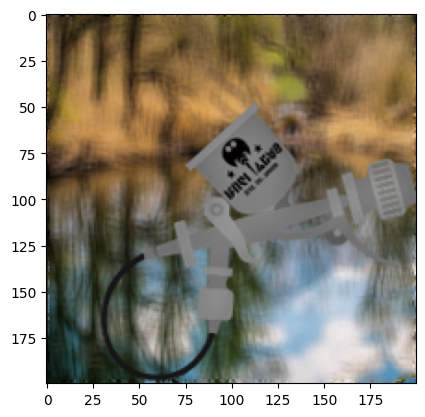

In [7]:
label, base = take_path_generate_dataset("main_icons")
print(label)
plt.imshow(np.array(base))
plt.show()

In [8]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset_directory = "230204_main_weapons"
import os

if not os.path.exists(dataset_directory):
   os.makedirs(dataset_directory)

for i in range(10000):
        label, base = take_path_generate_dataset("main_icons")
        if not os.path.exists(f"{dataset_directory}/{label}"):
            print(f"{dataset_directory}/{label}")
            os.mkdir(f"{dataset_directory}/{label}")
        base = base.resize((64,64))
        base.save(f"{dataset_directory}/{label}/{time.time()}.jpg", quality=95)

230204_main_weapons/Glooga-Dualies
230204_main_weapons/Clash-Blaster
230204_main_weapons/Carbon-Roller-Deco
230204_main_weapons/Dapple-Dualies
230204_main_weapons/Big-Swig-Roller
230204_main_weapons/Bloblobber
230204_main_weapons/Tenta-Brella
230204_main_weapons/Dualie-Squelchers
230204_main_weapons/Splat-Brella
230204_main_weapons/Squiffer
230204_main_weapons/N-ZAP85
230204_main_weapons/Rapid-Blaster-Pro
230204_main_weapons/Dark-Tetra-Dualies
230204_main_weapons/Dynamo-Roller
230204_main_weapons/52-Gal
230204_main_weapons/L-3-Nozzlenose
230204_main_weapons/Splattershot-Nova
230204_main_weapons/Nautilus-47
230204_main_weapons/Sloshing-Machine
230204_main_weapons/Splattershot
230204_main_weapons/Aerospray-RG
230204_main_weapons/Custom-Splattershot-Jr
230204_main_weapons/Undercover-Brella
230204_main_weapons/Splattershot-Pro
230204_main_weapons/Carbon-Roller
230204_main_weapons/Heavy-Splatling
230204_main_weapons/Explosher
230204_main_weapons/E-liter-4K
230204_main_weapons/Inkbrush-Nouve